In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


In [3]:
import seaborn as sns
import matplotlib.pyplot as plt 
import missingno as msno
import warnings
warnings.filterwarnings('ignore')

In [4]:
df1 = pd.read_csv('laptops_train.csv')
df2 = pd.read_csv('laptops_test.csv')
df = pd.concat([df1,df2])

In [5]:
df.head(10)

,Manufacturer,Model Name,Category,Screen Size,Screen,CPU,RAM,Storage,GPU,Operating System,Operating System Version,Weight,Price
0,Apple,MacBook Pro,Ultrabook,"13.3""",IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,NaN,1.37kg,11912523.48
1,Apple,Macbook Air,Ultrabook,"13.3""",1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,NaN,1.34kg,7993374.48
2,HP,250 G6,Notebook,"15.6""",Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,NaN,1.86kg,5112900.00
3,Apple,MacBook Pro,Ultrabook,"15.4""",IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,NaN,1.83kg,22563005.40
4,Apple,MacBook Pro,Ultrabook,"13.3""",IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,NaN,1.37kg,16037611.20
5,Acer,Aspire 3,Notebook,"15.6""",1366x768,AMD A9-Series 9420 3GHz,4GB,500GB HDD,AMD Radeon R5,Windows,10,2.1kg,3556800.00
6,Apple,MacBook Pro,Ultrabook,"15.4""",IPS Panel Retina Display 2880x1800,Intel Core i7 2.2GHz,16GB,256GB Flash Storage,Intel Iris Pro Graphics,Mac OS,X,2.04kg,19028613.24
7,Apple,Macbook Air,Ultrabook,"13.3""",1440x900,Intel Core i5 1.8GHz,8GB,256GB Flash Storage,Intel HD Graphics 6000,macOS,NaN,1.34kg,10303160.40
8,Asus,ZenBook UX430UN,Ultrabook,"14.0""",Full HD 1920x1080,Intel Core i7 8550U 1.8GHz,16GB,512GB SSD,Nvidia GeForce MX150,Windows,10,1.3kg,13293540.00
9,Acer,Swift 3,Ultrabook,"14.0""",IPS Panel Full HD 1920x1080,Intel Core i5 8250U 1.6GHz,8GB,256GB SSD,Intel UHD Graphics 620,Windows,10,1.6kg,6846840.00


In [6]:
df.columns
df.shape

(1302, 13)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1302 entries, 0 to 324
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Manufacturer              1302 non-null   object 
 1   Model Name                1302 non-null   object 
 2   Category                  1302 non-null   object 
 3   Screen Size               1302 non-null   object 
 4   Screen                    1302 non-null   object 
 5   CPU                       1302 non-null   object 
 6   RAM                       1302 non-null   object 
 7    Storage                  1302 non-null   object 
 8   GPU                       1302 non-null   object 
 9   Operating System          1302 non-null   object 
 10  Operating System Version  1132 non-null   object 
 11  Weight                    1302 non-null   object 
 12  Price                     1302 non-null   float64
dtypes: float64(1), object(12)
memory usage: 142.4+ KB


In [8]:
df = df.drop('Operating System Version', axis='columns')
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1302 entries, 0 to 324
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Manufacturer      1302 non-null   object 
 1   Model Name        1302 non-null   object 
 2   Category          1302 non-null   object 
 3   Screen Size       1302 non-null   object 
 4   Screen            1302 non-null   object 
 5   CPU               1302 non-null   object 
 6   RAM               1302 non-null   object 
 7    Storage          1302 non-null   object 
 8   GPU               1302 non-null   object 
 9   Operating System  1302 non-null   object 
 10  Weight            1302 non-null   object 
 11  Price             1302 non-null   float64
dtypes: float64(1), object(11)
memory usage: 132.2+ KB


In [9]:
df.drop_duplicates(inplace = True)
df.shape

(1274, 12)

In [10]:
df.dropna()
df.isnull().sum() #no null values present

Manufacturer        0
Model Name          0
Category            0
Screen Size         0
Screen              0
CPU                 0
RAM                 0
 Storage            0
GPU                 0
Operating System    0
Weight              0
Price               0
dtype: int64

In [11]:
df["RAM"].value_counts()
df["Manufacturer"].value_counts()

Manufacturer
Dell         291
Lenovo       289
HP           268
Asus         151
Acer         101
MSI           54
Toshiba       48
Apple         21
Samsung        9
Razer          7
Mediacom       7
Microsoft      6
Xiaomi         4
Vero           4
Chuwi          3
Google         3
Fujitsu        3
LG             3
Huawei         2
Name: count, dtype: int64

In [12]:

df['RAM'] = df['RAM'].str.replace("GB",'')
df['RAM'] = df['RAM'].astype('int64')
df.rename(columns = {'RAM':'RAM(GB)'},inplace=True)

In [13]:
df.head()

,Manufacturer,Model Name,Category,Screen Size,Screen,CPU,RAM(GB),Storage,GPU,Operating System,Weight,Price
0,Apple,MacBook Pro,Ultrabook,"13.3""",IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,11912523.48
1,Apple,Macbook Air,Ultrabook,"13.3""",1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,7993374.48
2,HP,250 G6,Notebook,"15.6""",Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,5112900.00
3,Apple,MacBook Pro,Ultrabook,"15.4""",IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,22563005.40
4,Apple,MacBook Pro,Ultrabook,"13.3""",IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,16037611.20


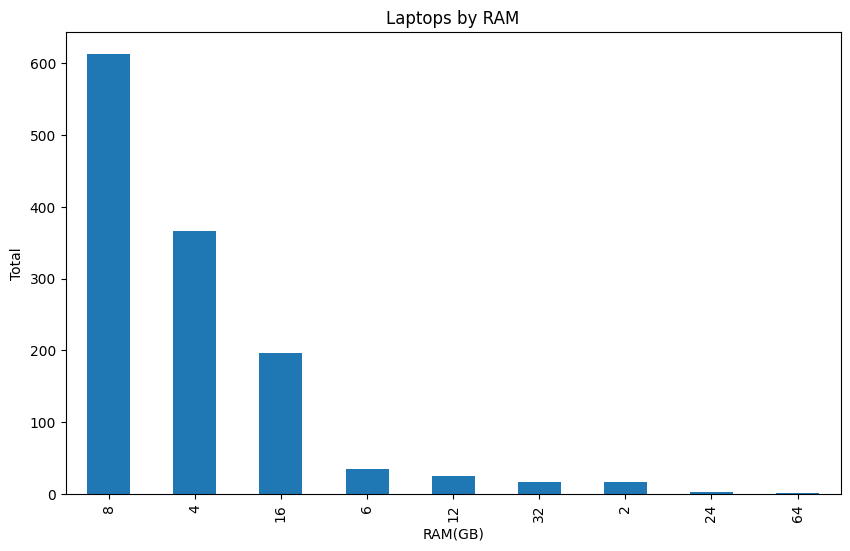

In [14]:


s = df['RAM(GB)'].value_counts()
plt.figure(figsize=(10,6))

s.plot(kind='bar')
plt.ylabel('Total')
plt.title('Laptops by RAM')
plt.show()



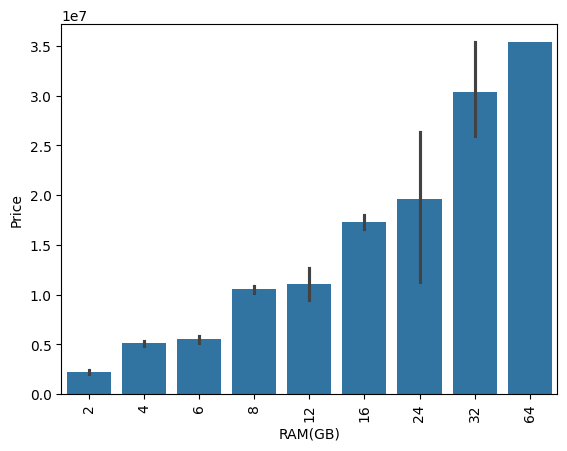

In [15]:
sns.barplot(x=df['RAM(GB)'],y=df['Price'])
plt.xticks(rotation='vertical')
plt.show()



In [16]:
df["Weight"].value_counts()

Weight
2.2kg     117
2.1kg      58
2.4kg      42
2.5kg      38
2.3kg      36
         ... 
1.14kg      1
3.8kg       1
1.19kg      1
1.55kg      1
4.0kg       1
Name: count, Length: 179, dtype: int64

In [17]:
# We have to remove kg and keep weight as float
df['Weight'] = df['Weight'].str.replace("kg",'')
df['Weight'] = df['Weight'].str.replace("s",'')
df['Weight'] = df['Weight'].astype('float64')

df.rename(columns = {'Weight':'Weight(Kg)'}, inplace = True)
df.head()

,Manufacturer,Model Name,Category,Screen Size,Screen,CPU,RAM(GB),Storage,GPU,Operating System,Weight(Kg),Price
0,Apple,MacBook Pro,Ultrabook,"13.3""",IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,11912523.48
1,Apple,Macbook Air,Ultrabook,"13.3""",1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,7993374.48
2,HP,250 G6,Notebook,"15.6""",Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,5112900.00
3,Apple,MacBook Pro,Ultrabook,"15.4""",IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,22563005.40
4,Apple,MacBook Pro,Ultrabook,"13.3""",IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,16037611.20


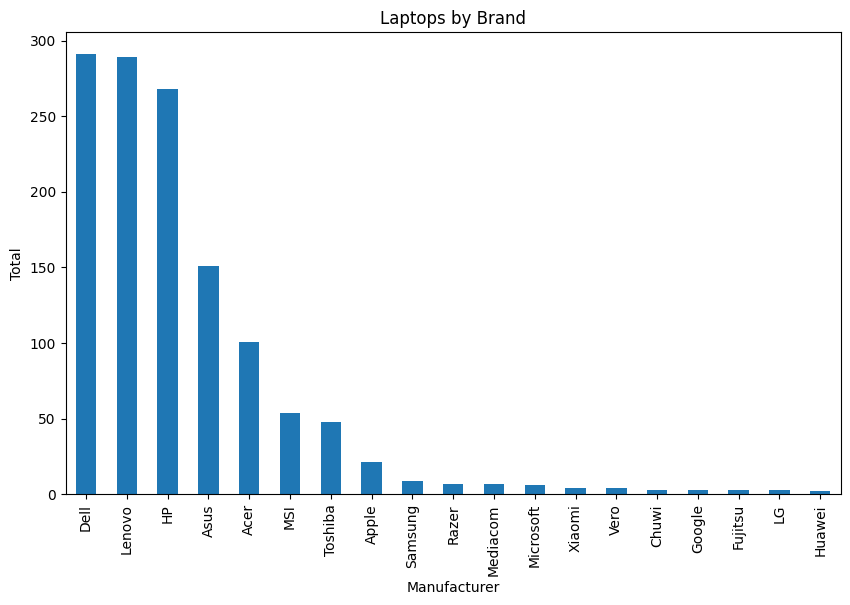

In [18]:
s = df['Manufacturer'].value_counts()
plt.figure(figsize=(10,6))

s.plot(kind='bar')
plt.ylabel('Total')
plt.title('Laptops by Brand')
plt.show()

# Dell, Lenovo and HP are  highly sold

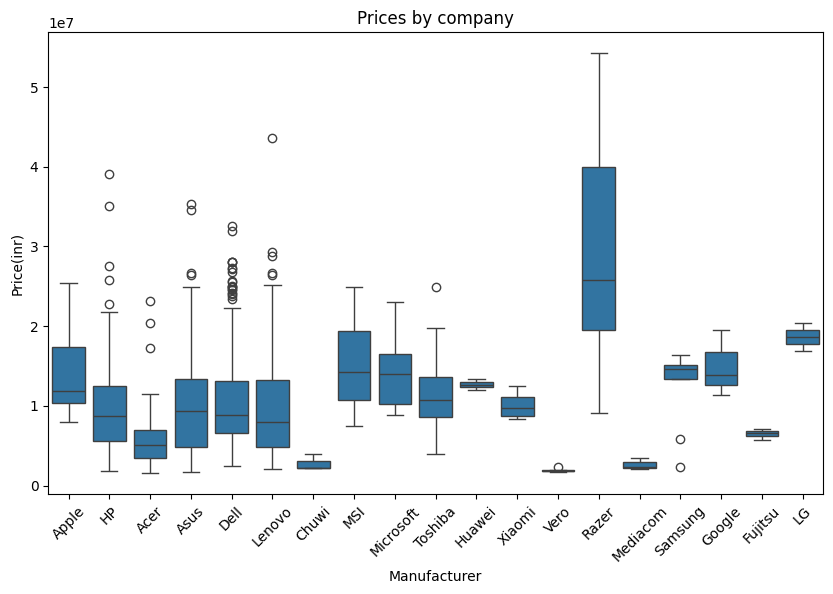

In [19]:
plt.figure(figsize=(10, 6))
sns.boxplot(x="Manufacturer", y="Price", data=df)
plt.xlabel("Manufacturer")
plt.ylabel("Price(inr)")
plt.title("Prices by company")
plt.xticks(rotation=45)
plt.show()

# Razer is most expensive

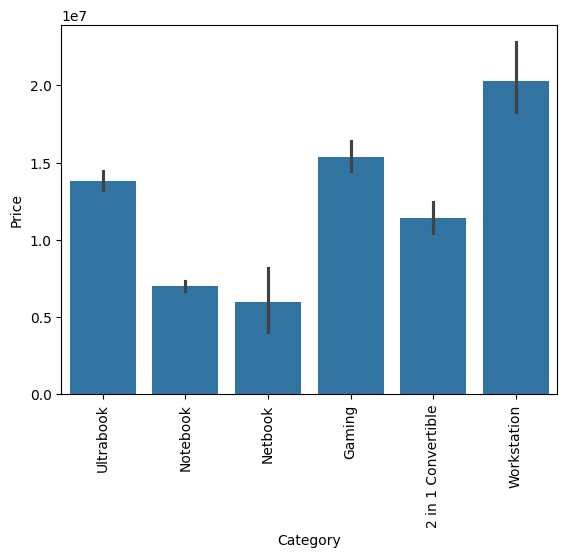

In [20]:
sns.barplot(x=df['Category'],y=df['Price'])
plt.xticks(rotation='vertical')
plt.show()

# Workstation is most expensive

(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, 'Notebook'),
  Text(1, 0, 'Gaming'),
  Text(2, 0, 'Ultrabook'),
  Text(3, 0, '2 in 1 Convertible'),
  Text(4, 0, 'Workstation'),
  Text(5, 0, 'Netbook')])

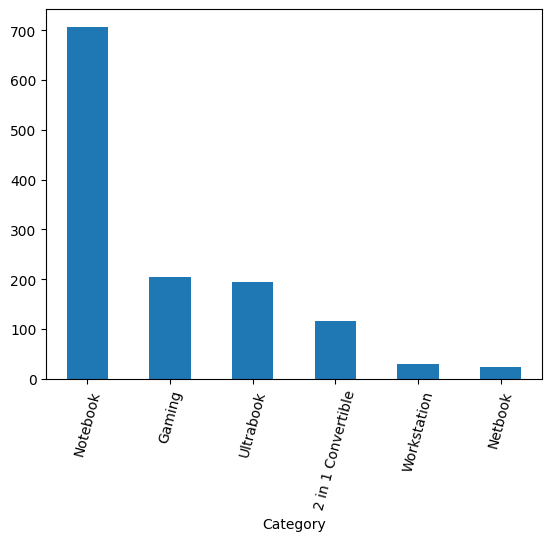

In [21]:
df['Category'].value_counts().plot(kind = 'bar')
plt.xticks(rotation = 75)

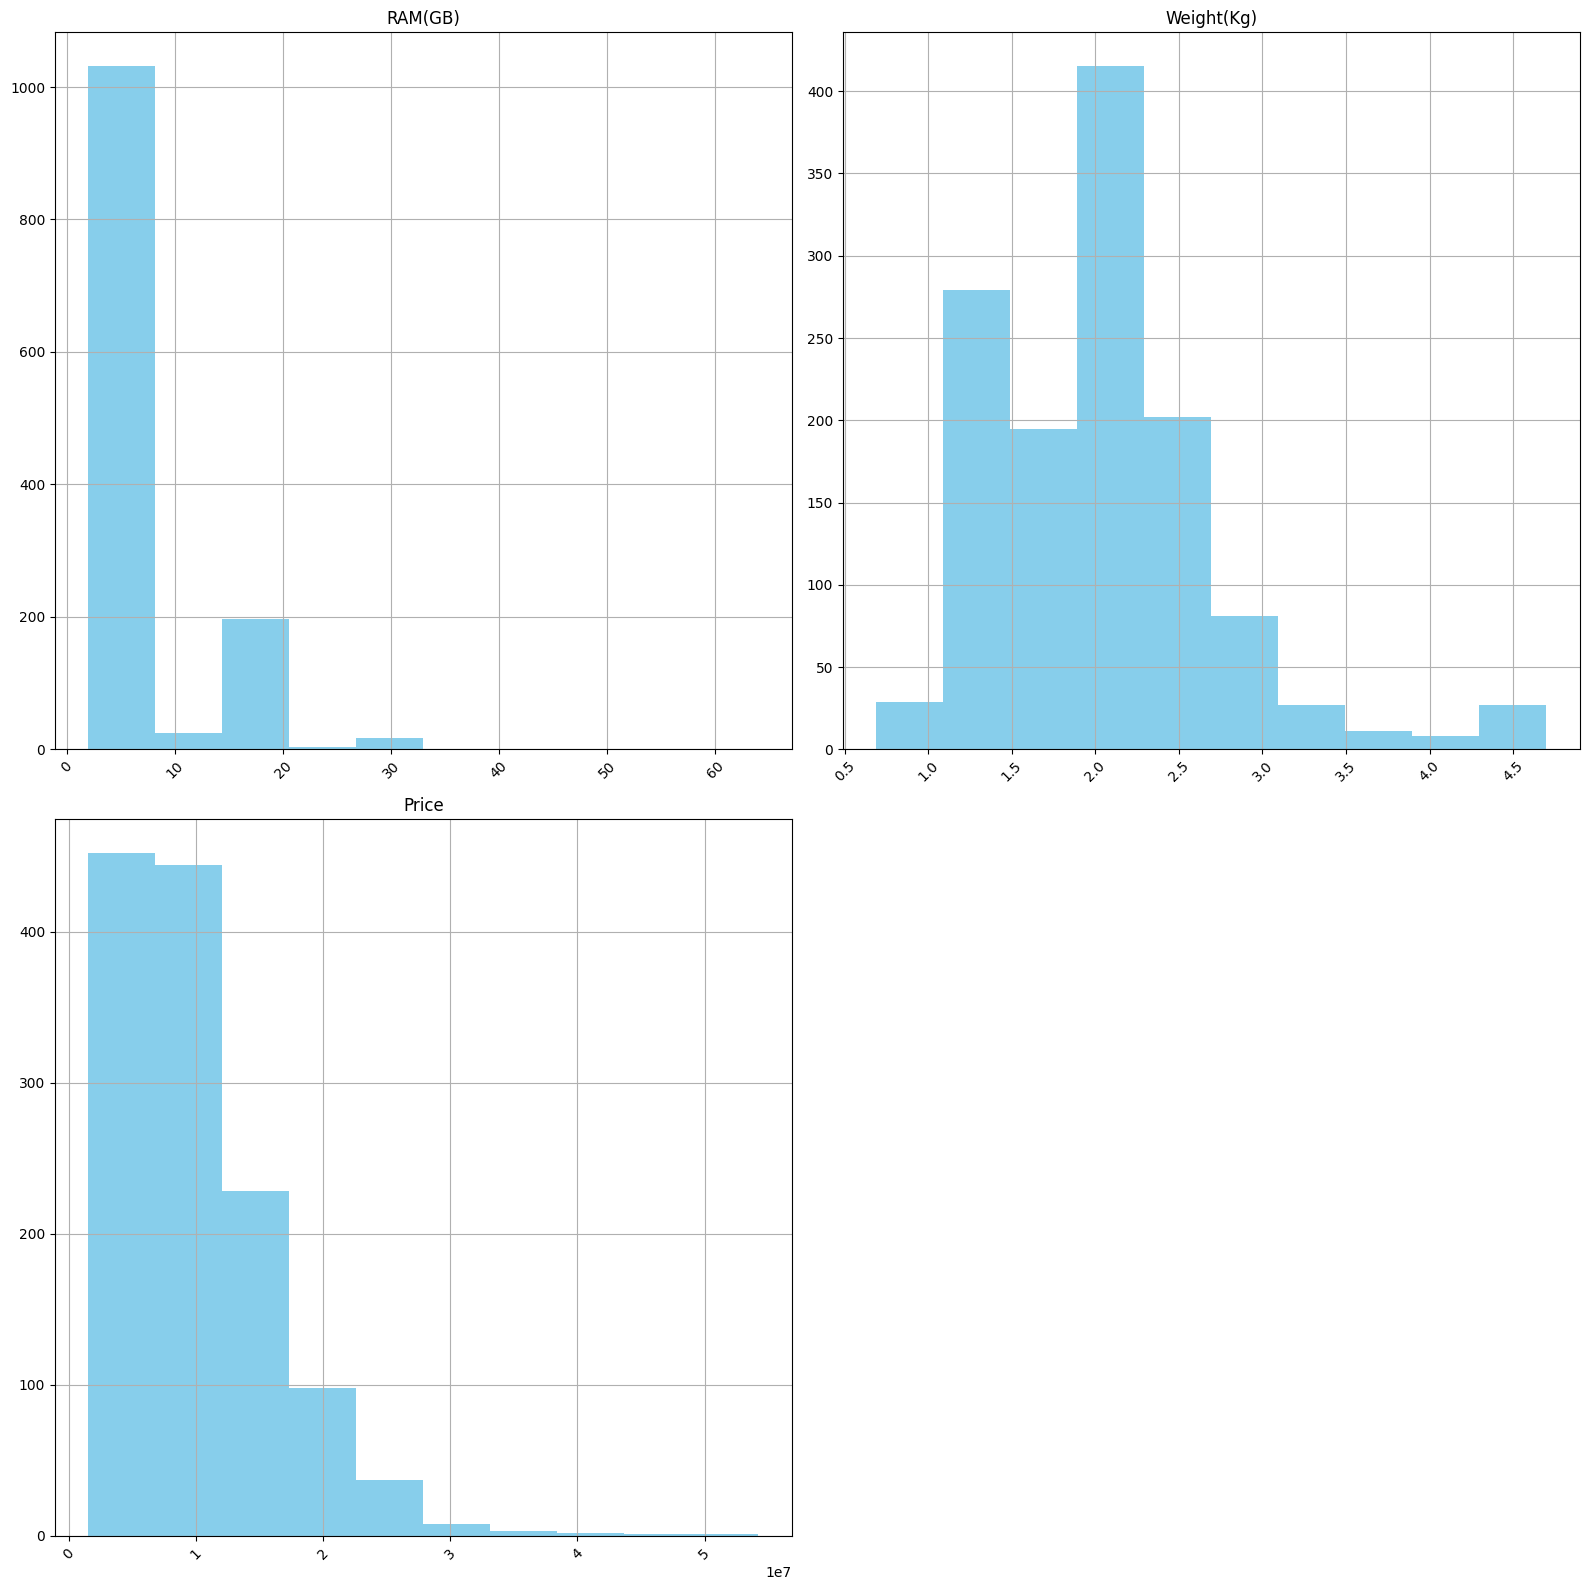

In [22]:
df.hist(figsize=(16,16),xrot=45,color='skyblue')
plt.tight_layout()
plt.show()

In [23]:
df.rename(columns = {' Storage':'Storage'},inplace=True)

In [24]:
df['Storage'].value_counts()

Storage
256GB SSD                        412
1TB HDD                          216
500GB HDD                        124
512GB SSD                        114
128GB SSD +  1TB HDD              94
128GB SSD                         74
256GB SSD +  1TB HDD              73
32GB Flash Storage                36
2TB HDD                           16
512GB SSD +  1TB HDD              14
1TB SSD                           14
64GB Flash Storage                13
256GB SSD +  2TB HDD              10
256GB Flash Storage                8
16GB Flash Storage                 7
1TB Hybrid                         7
32GB SSD                           6
1GB SSD                            5
128GB Flash Storage                4
16GB SSD                           3
512GB Flash Storage                2
1TB SSD +  1TB HDD                 2
512GB SSD +  2TB HDD               2
256GB SSD +  500GB HDD             2
128GB SSD +  2TB HDD               2
256GB SSD +  256GB SSD             2
512GB SSD +  256GB SSD        

In [25]:
df['Operating System'].value_counts()

Operating System
Windows      1100
No OS          66
Linux          58
Chrome OS      27
macOS          13
Mac OS          8
Android         2
Name: count, dtype: int64

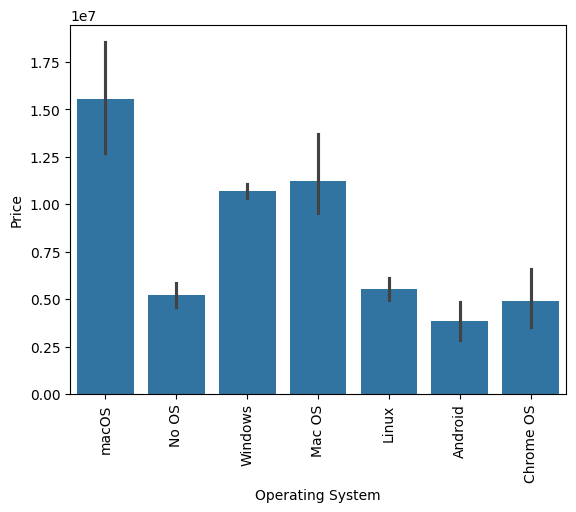

In [26]:
sns.barplot(x=df['Operating System'],y=df['Price'])
plt.xticks(rotation='vertical')
plt.show()

# MacOS is most expensive

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1274 entries, 0 to 296
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Manufacturer      1274 non-null   object 
 1   Model Name        1274 non-null   object 
 2   Category          1274 non-null   object 
 3   Screen Size       1274 non-null   object 
 4   Screen            1274 non-null   object 
 5   CPU               1274 non-null   object 
 6   RAM(GB)           1274 non-null   int64  
 7   Storage           1274 non-null   object 
 8   GPU               1274 non-null   object 
 9   Operating System  1274 non-null   object 
 10  Weight(Kg)        1274 non-null   float64
 11  Price             1274 non-null   float64
dtypes: float64(2), int64(1), object(9)
memory usage: 129.4+ KB


In [28]:
# Encoding Columns
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

# Price is removed
columns_to_encode = ['Manufacturer', 'Model Name', 'Category',
        'Screen Size', 'Screen','CPU', 'RAM(GB)', 'Storage',
        'GPU', 'Operating System', 'Weight(Kg)']

label_encoders = {}
for column in columns_to_encode:
    le = LabelEncoder()
    df[column] = le.fit_transform(df[column])
    label_encoders[column] = le

In [29]:
df.columns

Index(['Manufacturer', 'Model Name', 'Category', 'Screen Size', 'Screen',
       'CPU', 'RAM(GB)', 'Storage', 'GPU', 'Operating System', 'Weight(Kg)',
       'Price'],
      dtype='object')

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1274 entries, 0 to 296
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Manufacturer      1274 non-null   int32  
 1   Model Name        1274 non-null   int32  
 2   Category          1274 non-null   int32  
 3   Screen Size       1274 non-null   int32  
 4   Screen            1274 non-null   int32  
 5   CPU               1274 non-null   int32  
 6   RAM(GB)           1274 non-null   int64  
 7   Storage           1274 non-null   int32  
 8   GPU               1274 non-null   int32  
 9   Operating System  1274 non-null   int32  
 10  Weight(Kg)        1274 non-null   int64  
 11  Price             1274 non-null   float64
dtypes: float64(1), int32(9), int64(2)
memory usage: 84.6 KB


In [31]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Manufacturer,1274.0,6.463893e+00,4.095947e+00,0.0,4.00,7.0,10.00,18.0
Model Name,1274.0,3.069349e+02,1.708224e+02,0.0,180.25,291.0,453.75,616.0
Category,1274.0,2.584772e+00,1.246313e+00,0.0,1.00,3.0,3.00,5.0
Screen Size,1274.0,1.198666e+01,3.627898e+00,0.0,10.00,14.0,14.00,17.0
Screen,1274.0,9.320251e+00,7.879360e+00,0.0,7.00,8.0,15.00,39.0
CPU,1274.0,7.734929e+01,2.497879e+01,0.0,68.00,78.0,97.00,117.0
RAM(GB),1274.0,2.751962e+00,1.457871e+00,0.0,1.00,3.0,3.00,8.0
Storage,1274.0,1.495212e+01,8.176378e+00,0.0,8.00,15.0,21.75,37.0
GPU,1274.0,5.488148e+01,2.166047e+01,0.0,47.00,53.0,72.00,109.0
Operating System,1274.0,4.716641e+00,8.919238e-01,0.0,5.00,5.0,5.00,6.0


In [32]:
from sklearn.model_selection import train_test_split 

x=df.drop(['Price'],axis=1).values
y=df['Price'].values

In [33]:
x_train , x_test , y_train , y_test= train_test_split(x,y,test_size=.25,random_state=25)

In [34]:
print(x.shape)
print(y.shape)

(1274, 11)
(1274,)


In [35]:
print(x_test.shape)
print(x_train.shape)

(319, 11)
(955, 11)


In [36]:
# Data Scaling

from sklearn.preprocessing import RobustScaler
ro_scaler = RobustScaler()
x_train = ro_scaler.fit_transform(x_train)
x_test = ro_scaler.fit_transform(x_test)

x_train.shape

(955, 11)

In [37]:
# Linear Regression
from sklearn.linear_model import LinearRegression
le = LinearRegression()

le.fit(x_train,y_train)

LinearRegression()

In [38]:
le.score(x_test,y_test)

0.5831407514510656

In [39]:
le.score(x_train,y_train)

0.6540336239794324

In [40]:
print(le.coef_)
print(le.intercept_)

[ 381090.41657074  424428.54296923  391502.78468725 -721945.58921649
  389887.29142461 1076204.66933111 4818891.47263861 1067069.21807241
  944188.23998262  630231.1388246   383837.98310912]
10491317.802421857


In [41]:
pd.DataFrame(le.coef_ , df.columns[:-1] , columns = ["coefficient"])

,coefficient
Manufacturer,3.810904e+05
Model Name,4.244285e+05
Category,3.915028e+05
Screen Size,-7.219456e+05
Screen,3.898873e+05
CPU,1.076205e+06
RAM(GB),4.818891e+06
Storage,1.067069e+06
GPU,9.441882e+05
Operating System,6.302311e+05


In [42]:
y_pred = le.predict(x_test)
# y_pred

In [43]:
new1 = pd.DataFrame({"Y_test" : y_test , "Y_predict": y_pred})
new1.head(10)

,Y_test,Y_predict
0,7407124.92,4.544886e+06
1,7922772.00,1.121743e+07
2,6998004.00,1.214561e+07
3,22221108.00,1.329293e+07
4,15996708.00,1.166317e+07
5,10394748.00,1.083516e+07
6,28000908.00,2.131874e+07
7,5023980.00,3.571942e+06
8,9123192.00,1.340432e+07
9,13320216.00,1.687166e+07


In [44]:
# Evaluate
from sklearn.metrics import r2_score
reg_score = r2_score(y_test , y_pred)
reg_score

0.5831407514510656

In [45]:
p = x_train.shape[1]
n = len(y_train)
adj_R2 = 1 - (reg_score) * (n - 1) / (n - p - 1)
adj_R2

0.41005697043020506

In [46]:
from sklearn.metrics import mean_absolute_error , mean_absolute_percentage_error , mean_squared_error
print(mean_absolute_percentage_error(y_test , y_pred))
print(mean_absolute_error(y_test , y_pred))


0.363987444859994
3135547.1382225165


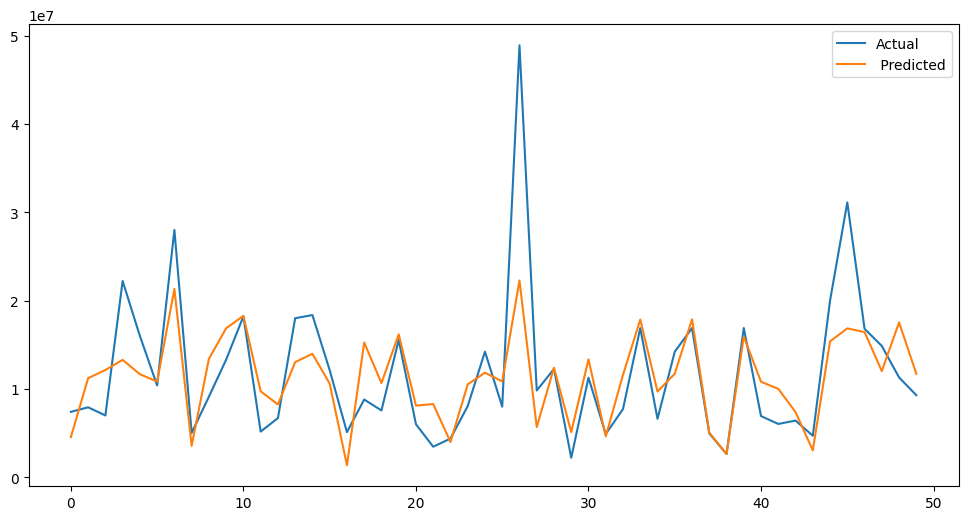

In [47]:
plt.figure(figsize= (12,6))
plt.plot(new1[:50])
plt.legend(["Actual" , " Predicted"])

In [48]:
import statsmodels.api as sm
x2 = sm.add_constant(x)
est = sm.OLS(y , x2)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.633
Model:                            OLS   Adj. R-squared:                  0.630
Method:                 Least Squares   F-statistic:                     198.0
Date:                Sun, 05 May 2024   Prob (F-statistic):          1.65e-265
Time:                        19:47:21   Log-Likelihood:                -21100.
No. Observations:                1274   AIC:                         4.222e+04
Df Residuals:                    1262   BIC:                         4.229e+04
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -5.261e+06   8.11e+05     -6.485      0.0

In [49]:
print(est2.rsquared_adj)

0.6299168565617415


In [50]:
# Random Forest

from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(max_depth= 30 , max_features= 60)
rf.fit(x_train,y_train)

RandomForestRegressor(max_depth=30, max_features=60)

In [51]:
print(rf.score(x_train,y_train))
print(rf.score(x_test,y_test))

0.9756906594004324
0.7314733804233309


In [52]:
y_pred = rf.predict(x_test)
# y_pred

In [53]:
new2 = pd.DataFrame({"Y_test" : y_test , "Y_predict": y_pred})
new2.tail(10)

,Y_test,Y_predict
309,10928268.00,1.142050e+07
310,19820268.00,1.284644e+07
311,13329108.00,1.374923e+07
312,3281148.00,2.906392e+06
313,12350988.00,1.084737e+07
314,4437108.00,4.794691e+06
315,11995308.00,8.604377e+06
316,13062348.00,1.272189e+07
317,2243985.12,2.432160e+06
318,7816068.00,8.419035e+06


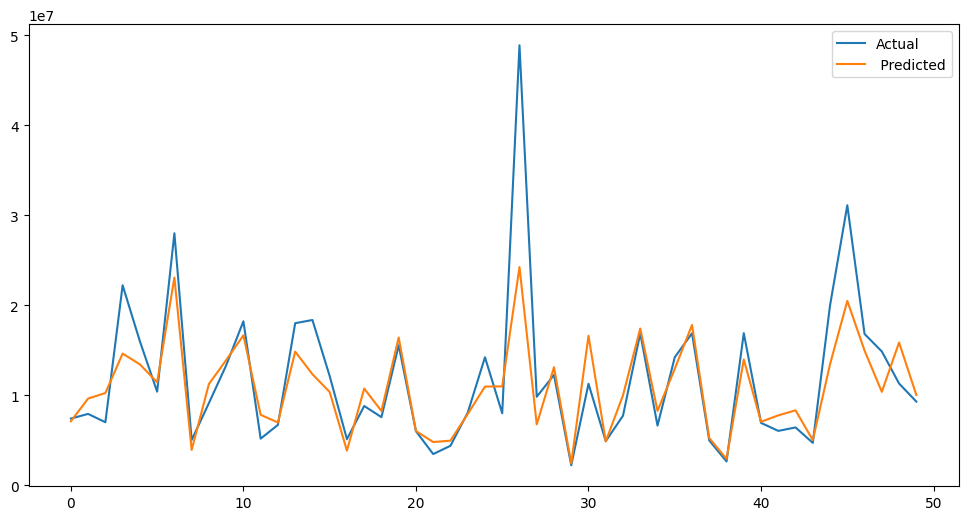

In [54]:
plt.figure(figsize= (12,6))
plt.plot(new2[:50])
plt.legend(["Actual" , " Predicted"])

In [55]:
from sklearn.metrics import r2_score
ran_score = r2_score(y_test , y_pred)
ran_score

0.7314733804233309

### XG Boost

In [56]:
import xgboost as xgb
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split


# Create an XGBoost regressor
xgb_regressor = xgb.XGBRegressor()

# Train the model
xgb_regressor.fit(x_train,y_train)

# Make predictions
y_pred_train = xgb_regressor.predict(x_train)
y_pred_test = xgb_regressor.predict(x_test)

# Calculate R2 score
r2_train = r2_score(y_train, y_pred_train)
r2_test = r2_score(y_test, y_pred_test)


print("Testing R2 Score:", r2_test)


Testing R2 Score: 0.7485776295236833


In [59]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Step 1: Data Preparation
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 3: Model Initialization
model = LogisticRegression()

# Step 4: Model Training
model.fit(x_train, y_train)

# Step 5: Model Evaluation
y_pred = model.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Step 6: Hyperparameter Tuning (Optional)
# Perform hyperparameter tuning using techniques like grid search or random search

# Step 7: Final Model Training (Optional)
# Train the final model using the entire dataset

# Step 8: Model Deployment (Optional)
# Deploy the trained model for making predictions on new data



ValueError: Unknown label type: continuous. Maybe you are trying to fit a classifier, which expects discrete classes on a regression target with continuous values.

In [60]:
from sklearn.linear_model import LogisticRegression

# Step 3: Model Initialization
logistic_reg = LogisticRegression()

# Step 4: Model Training
logistic_reg.fit(x_train, y_train)

# Step 5: Model Evaluation
accuracy = logistic_reg.score(x_test, y_test)
print("Accuracy:", accuracy)

# If you want to get predictions
y_pred = logistic_reg.predict(x_test)


ValueError: Unknown label type: continuous. Maybe you are trying to fit a classifier, which expects discrete classes on a regression target with continuous values.